In [12]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, f1_score, accuracy_score
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

from sklearn.neural_network import MLPClassifier
import timeit
import time


In [13]:
#wine quality data set
data = pd.read_csv('winequality-white.csv',sep=';',quotechar='"')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [14]:
def isTasty(quality):
    if quality >= 7:
        return 1
    else:
        return 0

In [15]:
data['tasty'] = data['quality'].apply(isTasty)

In [16]:
data['tasty'].value_counts()

0    3838
1    1060
Name: tasty, dtype: int64

In [17]:
feature = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
target = data['tasty']

In [18]:
X=feature.values
Y=target.values
np.reshape(Y,(1,-1))

array([[0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [19]:
feature.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


In [20]:
# Split data into train and  test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print ("Training set in wine quality classification model has {} samples.".format(X_train.shape[0]))
print ("Testing set in wine quality classification model has {} samples.".format(X_test.shape[0]))

Training set in wine quality classification model has 3673 samples.
Testing set in wine quality classification model has 1225 samples.


In [21]:
import mlrose
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer
#from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV

In [22]:
# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
#Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.
# This has been done in Assignment 1. Based on reviewer's comments, I further tried different activation function and hidden layer size.
# Also, Multi-layer Perceptron is sensitive to feature scaling, so I did it.

start_time=time.time()


MLP = MLPClassifier(random_state=1)
mlp_param_grid = {'hidden_layer_sizes' : [(20,),(40,),(60,),(80,)], 
                  'activation': ['relu', 'logistic'],
                  'max_iter':[400,600,1000, 2000,3000]}

gsMLP = GridSearchCV(MLP,param_grid = mlp_param_grid, cv=5, scoring='accuracy',n_jobs=-1,verbose=1)
gsMLP.fit(X_train_scaled,y_train)
MLP_best = gsMLP.best_estimator_

#gsMLP.best_score_

print("process time total:{:.2f} seconds".format(time.time()-start_time))


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  5.6min finished


process time total:344.65 seconds


In [22]:
print("best score: %s" % gsMLP.best_score_)
print("best param: %s" % gsMLP.best_params_)

best score: 0.825483256193847
best param: {'activation': 'relu', 'hidden_layer_sizes': (60,), 'max_iter': 600}


In [23]:
#Re-run NN with the best parameters reported in Grid Search

nn1 = MLPClassifier(max_iter=600,activation='relu',
                    #solver='lbfgs',
                    hidden_layer_sizes=[60,],random_state=1)

# Training
start_time = timeit.default_timer()
nn1.fit(X_train_scaled, y_train)
end_time = timeit.default_timer()
training_time = end_time - start_time
print("Model Training Time (s):   "+"{:.5f}".format(training_time))

Model Training Time (s):   7.18351


In [24]:
# Predict labels for test set and assess accuracy
y_test_pred_mlp = nn1.predict(X_test_scaled)
y_test_accuracy_mlp = round(accuracy_score(y_test, y_test_pred_mlp),3)
print('Accuracy score (test set, pruned):', y_test_accuracy_mlp)

# Predict labels for train set and assess accuracy
y_train_pred_mlp = nn1.predict(X_train_scaled)
y_train_accuracy_mlp = round(accuracy_score(y_train, y_train_pred_mlp),3)
print('Accuracy score (train set, pruned):',y_train_accuracy_mlp)

Accuracy score (test set, pruned): 0.811
Accuracy score (train set, pruned): 0.833


In [25]:
# with the same parameters found in grid search -NN above, we re-run all three local random search algorithms.
import mlrose
nn1_rhc = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'random_hill_climb', 
                           bias = True,  is_classifier = True, 
                           #learning_rate=0.1, 
                           early_stopping=True, 
                           #clip_max=5, 
                           max_attempts =1000, max_iters=600)

# Training
start_time = timeit.default_timer()
nn1_rhc.fit(X_train_scaled, y_train)
end_time = timeit.default_timer()
training_time = end_time - start_time
print("Model Training Time - NN1-RHC (s):   "+"{:.5f}".format(training_time))

# Predict labels for test set and assess accuracy
y_test_pred_nn1rhc = nn1_rhc.predict(X_test_scaled)
y_test_accuracy_nn1rhc = round(accuracy_score(y_test, y_test_pred_nn1rhc),3)
print('Accuracy score (test set, pruned):', y_test_accuracy_nn1rhc)

# Predict labels for train set and assess accuracy
y_train_pred_nn1rhc = nn1_rhc.predict(X_train_scaled)
y_train_accuracy_nn1rhc = round(accuracy_score(y_train, y_train_pred_nn1rhc),3)
print('Accuracy score (train set, pruned):',y_train_accuracy_nn1rhc)

Model Training Time - NN1-RHC (s):   7.82816
Accuracy score (test set, pruned): 0.76
Accuracy score (train set, pruned): 0.769


In [26]:
nn1_sa = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'simulated_annealing', 
                           bias = True,  is_classifier = True, 
                           #learning_rate=0.1, 
                           early_stopping=True, 
                           #clip_max=5, 
                           max_attempts =1000, max_iters=600)

# Training
start_time = timeit.default_timer()
nn1_sa.fit(X_train_scaled, y_train)
end_time = timeit.default_timer()
training_time = end_time - start_time
print("Model Training Time - NN1-SA (s):   "+"{:.5f}".format(training_time))

# Predict labels for test set and assess accuracy
y_test_pred_nn1sa = nn1_sa.predict(X_test_scaled)
y_test_accuracy_nn1sa = round(accuracy_score(y_test, y_test_pred_nn1sa),3)
print('Accuracy score (test set, pruned):', y_test_accuracy_nn1sa)

# Predict labels for train set and assess accuracy
y_train_pred_nn1sa = nn1_sa.predict(X_train_scaled)
y_train_accuracy_nn1sa = round(accuracy_score(y_train, y_train_pred_nn1sa),3)
print('Accuracy score (train set, pruned):',y_train_accuracy_nn1sa)

Model Training Time - NN1-SA (s):   10.92105
Accuracy score (test set, pruned): 0.718
Accuracy score (train set, pruned): 0.716


In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
nn1_ga = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'genetic_alg', 
                           bias = True,  is_classifier = True, 
                           #learning_rate=0.1, 
                           early_stopping=True, 
                           #clip_max=5, 
                           max_attempts =1000, max_iters=600)

# Training
start_time = timeit.default_timer()
nn1_ga.fit(X_train_scaled, y_train)
end_time = timeit.default_timer()
training_time = end_time - start_time
print("Model Training Time - NN1-GA (s):   "+"{:.5f}".format(training_time))

# Predict labels for test set and assess accuracy
y_test_pred_nn1ga = nn1_ga.predict(X_test_scaled)
y_test_accuracy_nn1ga = round(accuracy_score(y_test, y_test_pred_nn1ga),3)
print('Accuracy score (test set, pruned):', y_test_accuracy_nn1ga)

# Predict labels for train set and assess accuracy
y_train_pred_nn1ga = nn1_ga.predict(X_train_scaled)
y_train_accuracy_nn1ga = round(accuracy_score(y_train, y_train_pred_nn1ga),3)
print('Accuracy score (train set, pruned):',y_train_accuracy_nn1ga)

Model Training Time - NN1-GA (s):   1088.74383
Accuracy score (test set, pruned): 0.802
Accuracy score (train set, pruned): 0.807


In [47]:
test_accuracy_rhc_list=[]
#_train_accuracy_mlp_list=[]
num_iteration_range=range(1,650,50)
for max_iters in num_iteration_range:
    nn1rhc = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'random_hill_climb', 
                           bias = True,  is_classifier = True, 
                           #learning_rate=0.1, 
                           early_stopping=True, 
                           #clip_max=5, 
                           max_attempts =1000, max_iters=max_iters)
    nn1rhc.fit(X_train_scaled, y_train)
    
    test_pred_rhc = nn1rhc.predict(X_test_scaled)
    test_accuracy_rhc = accuracy_score(y_test, test_pred_rhc)
    #_train_pred_mlp = nn1.predict(X_train_scaled)
    #_train_accuracy_mlp = round(accuracy_score(y_train, y_train_pred_mlp),3)
    
    test_accuracy_rhc_list.append(test_accuracy_rhc)
    #_train_accuracy_mlp_list.append(y_train_accuracy_mlp)

In [81]:
test_accuracy_ga_list=[]
#_train_accuracy_mlp_list=[]
num_iteration_range=range(1,650,50)
for max_iters in num_iteration_range:
    nn1ga = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'genetic_alg', 
                           bias = True,  is_classifier = True, 
                           #learning_rate=0.1, 
                           early_stopping=True, 
                           #clip_max=5, 
                           max_attempts =1000, max_iters=max_iters)
    nn1ga.fit(X_train_scaled, y_train)
    
    test_pred_ga = nn1ga.predict(X_test_scaled)
    test_accuracy_ga = accuracy_score(y_test, test_pred_ga)
    #_train_pred_mlp = nn1.predict(X_train_scaled)
    #_train_accuracy_mlp = round(accuracy_score(y_train, y_train_pred_mlp),3)
    
    test_accuracy_ga_list.append(test_accuracy_ga)
    #_train_accuracy_mlp_list.append(y_train_accuracy_mlp)

In [82]:
test_accuracy_sa_list=[]
#_train_accuracy_mlp_list=[]
num_iteration_range=range(1,650,50)
for max_iters in num_iteration_range:
    nn1sa = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'simulated_annealing', 
                           bias = True,  is_classifier = True, 
                           #learning_rate=0.1, 
                           early_stopping=True, 
                           #clip_max=5, 
                           max_attempts =1000, max_iters=max_iters)
    nn1sa.fit(X_train_scaled, y_train)
    
    test_pred_sa = nn1sa.predict(X_test_scaled)
    test_accuracy_sa = accuracy_score(y_test, test_pred_sa)
    #_train_pred_mlp = nn1.predict(X_train_scaled)
    #_train_accuracy_mlp = round(accuracy_score(y_train, y_train_pred_mlp),3)
    
    test_accuracy_sa_list.append(test_accuracy_sa)
    #_train_accuracy_mlp_list.append(y_train_accuracy_mlp)

In [83]:
test_accuracy_mlp_list=[]
#_train_accuracy_mlp_list=[]
num_iteration_range=range(1,650,50)
for max_iter in num_iteration_range:
    nn1curve = MLPClassifier(max_iter=max_iter,activation='relu',
                    hidden_layer_sizes=[60],random_state=1)
    nn1curve.fit(X_train_scaled, y_train)
    
    test_pred_mlp = nn1curve.predict(X_test_scaled)
    test_accuracy_mlp = accuracy_score(y_test, test_pred_mlp)
    #_train_pred_mlp = nn1.predict(X_train_scaled)
    #_train_accuracy_mlp = round(accuracy_score(y_train, y_train_pred_mlp),3)
    
    test_accuracy_mlp_list.append(test_accuracy_mlp)
    #_train_accuracy_mlp_list.append(y_train_accuracy_mlp)
    

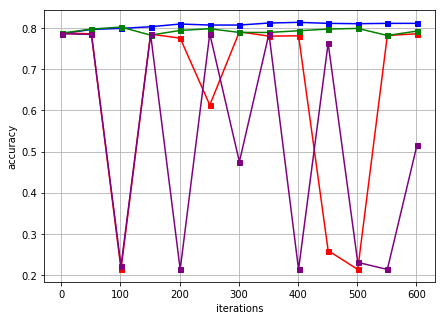

In [84]:
plt.figure(figsize=(7,5))
#plt.plot(num_estimators_range,y_train_accuracy_mlp_list,color='red', marker='o',markersize=5 )
plt.plot(num_iteration_range,test_accuracy_mlp_list,color='blue', marker='s',markersize=5 )
plt.plot(num_iteration_range,test_accuracy_rhc_list,color='red', marker='s',markersize=5 )
plt.plot(num_iteration_range,test_accuracy_ga_list,color='green', marker='s',markersize=5 )
plt.plot(num_iteration_range,test_accuracy_sa_list,color='purple', marker='s',markersize=5 )

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.show()

In [36]:
# Initialize neural network object and fit object
import mlrose
rhc_param_grid={'max_iters':[600,2000,3000,4000,5000,6000,7000,8000,9000,10000], 
                #'learning_rate': [0.1,0.001]
               }
nn_rhc = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'random_hill_climb', 
                           bias = True,  is_classifier = True,  
                              #learning_rate=0.0001,
                              early_stopping=True, 
                           #clip_max=5, 
                           max_attempts =3000)


In [37]:
nn_rhc.set_params()

NeuralNetwork(bias=True, clip_max=10000000000.0, early_stopping=True,
       hidden_nodes=[60], is_classifier=True, lr=0.1, max_iters=100,
       mutation_prob=0.1, pop_size=200,
       schedule=<mlrose.decay.GeomDecay object at 0x00000000144A3470>)

In [38]:
import time
start_time=time.time()

gsRHC=GridSearchCV(nn_rhc,param_grid=rhc_param_grid, cv=5, scoring='accuracy',n_jobs=-1,verbose=1)
gsRHC.fit(X_train_scaled, y_train)

RHC_best = gsRHC.best_estimator_

print("process time total:{:.2f} seconds".format(time.time()-start_time))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.3min finished


process time total:146.95 seconds


In [35]:
print("best score: %s" % gsRHC.best_score_)
print("best param: %s" % gsRHC.best_params_)

best score: 0.7340049006261912
best param: {'max_iters': 6000}


In [50]:
test_accuracy_rhc_iterlist=[]
num_iteration_range=range(1,10000,1000)
for max_iters in num_iteration_range:
    nn2iter = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'random_hill_climb', 
                           bias = True,  is_classifier = True, 
                           #learning_rate=0.1, 
                           early_stopping=True, 
                           #clip_max=5, 
                           max_attempts =10000, max_iters=max_iters)
    nn2iter.fit(X_train_scaled, y_train)
    
    test_pred_rhc = nn2iter.predict(X_test_scaled)
    test_accuracy_rhc = accuracy_score(y_test, test_pred_rhc)
    #_train_pred_mlp = nn1.predict(X_train_scaled)
    #_train_accuracy_mlp = round(accuracy_score(y_train, y_train_pred_mlp),3)
    
    test_accuracy_rhc_iterlist.append(test_accuracy_rhc)
    #_train_accuracy_mlp_list.append(y_train_accuracy_mlp)
    
    print ('iterations: %3d: test accuracy: %.3f' % (max_iters,test_accuracy_rhc))

iterations:   1: test accuracy: 0.786
iterations: 1001: test accuracy: 0.785
iterations: 2001: test accuracy: 0.787
iterations: 3001: test accuracy: 0.799
iterations: 4001: test accuracy: 0.801
iterations: 5001: test accuracy: 0.797
iterations: 6001: test accuracy: 0.802
iterations: 7001: test accuracy: 0.798
iterations: 8001: test accuracy: 0.804
iterations: 9001: test accuracy: 0.800


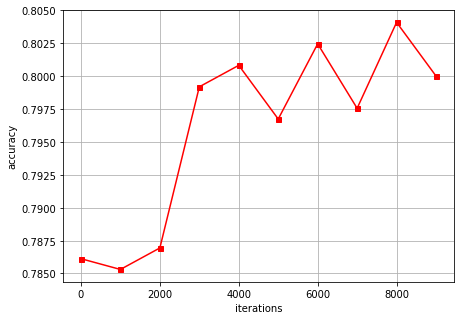

In [51]:
plt.figure(figsize=(7,5))

plt.plot(num_iteration_range,test_accuracy_rhc_iterlist,color='red', marker='s',markersize=5 )

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.show()

In [52]:
#RHC:Re-run NN with the best parameters reported in Grid Search

nn2 = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'random_hill_climb', 
                           bias = True,  is_classifier = True, 
                           #learning_rate=0.1, 
                           early_stopping=True, 
                           #clip_max=5, 
                           max_attempts =10000, max_iters=6000)

# Training
start_time = timeit.default_timer()
nn2.fit(X_train_scaled, y_train)
end_time = timeit.default_timer()
training_time = end_time - start_time
print("Model Training Time - RHC (s):   "+"{:.5f}".format(training_time))

Model Training Time - RHC (s):   62.55321


In [53]:
# Predict labels for test set and assess accuracy
y_test_pred_rhc = nn2.predict(X_test_scaled)
y_test_accuracy_rhc = accuracy_score(y_test, y_test_pred_rhc)
print('Accuracy score (test set, pruned):', y_test_accuracy_rhc)

# Predict labels for train set and assess accuracy
y_train_pred_rhc = nn2.predict(X_train_scaled)
y_train_accuracy_rhc = round(accuracy_score(y_train, y_train_pred_rhc),3)
print('Accuracy score (train set, pruned):',y_train_accuracy_rhc)

Accuracy score (test set, pruned): 0.8016326530612244
Accuracy score (train set, pruned): 0.808


In [54]:
import warnings
warnings.filterwarnings("ignore")

In [58]:
ga_param_grid={'max_iters':[2000,4000], 'pop_size': [50,100,200], 'mutation_prob':[0.1,0.01]}
nn_ga = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'genetic_alg', 
                           bias = True,  is_classifier = True,  
                              #learning_rate=0.0001,
                              early_stopping=True, 
                           #clip_max=5, 
                           max_attempts =3000)
nn_ga.set_params()


NeuralNetwork(bias=True, clip_max=10000000000.0, early_stopping=True,
       hidden_nodes=[60], is_classifier=True, lr=0.1, max_iters=100,
       mutation_prob=0.1, pop_size=200,
       schedule=<mlrose.decay.GeomDecay object at 0x00000000144A3470>)

In [59]:
start_time=time.time()

gsGA=GridSearchCV(nn_ga,param_grid=ga_param_grid, cv=5, scoring='accuracy',n_jobs=-1,verbose=1)
gsGA.fit(X_train_scaled, y_train)

GA_best = gsGA.best_estimator_

print("process time total:{:.2f} seconds".format(time.time()-start_time))


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.4min finished


process time total:149.78 seconds


In [60]:
print("best score: %s" % gsGA.best_score_)
print("best param: %s" % gsGA.best_params_)

best score: 0.7644976858154098
best param: {'max_iters': 4000, 'mutation_prob': 0.01, 'pop_size': 200}


In [66]:
#GA:Re-run NN with the best parameters reported in Grid Search

nn3 = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'genetic_alg', mutation_prob=0.01,
                           bias = True,  is_classifier = True, 
                           #learning_rate=0.1, 
                           early_stopping=True, 
                           #clip_max=5, 
                           pop_size=200,
                           max_attempts =1000, max_iters=4000)

# Training
start_time = timeit.default_timer()
nn3.fit(X_train_scaled, y_train)
end_time = timeit.default_timer()
training_time = end_time - start_time
print("Model Training Time - GA (s):   "+"{:.5f}".format(training_time))

Model Training Time - GA (s):   1747.95819


In [68]:
# Predict labels for test set and assess accuracy
y_test_pred_ga = nn3.predict(X_test_scaled)
y_test_accuracy_ga = accuracy_score(y_test, y_test_pred_ga)
print('Accuracy score (test set, pruned):', y_test_accuracy_ga)

# Predict labels for train set and assess accuracy
y_train_pred_ga = nn3.predict(X_train_scaled)
y_train_accuracy_ga = round(accuracy_score(y_train, y_train_pred_ga),3)
print('Accuracy score (train set, pruned):',y_train_accuracy_ga)

Accuracy score (test set, pruned): 0.7836734693877551
Accuracy score (train set, pruned): 0.799


In [ ]:
test_accuracy_ga_iterlist=[]
#train_accuracy_ga_iterlist=[]

num_mutation_range=(0.01,0.1)
for max_iters in num_iteration_range:
    nn3muta = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'genetic_alg', mutation_prob=0.01,
                           bias = True,  is_classifier = True, 
                           #learning_rate=0.1, 
                           early_stopping=True, 
                           #clip_max=5, 
                           pop_size=200,
                           max_attempts =500, max_iters=1000)


    nn3muta.fit(X_train_scaled, y_train)
    
    test_pred_ga = nn3muta.predict(X_test_scaled)
    test_accuracy_ga = accuracy_score(y_test, test_pred_ga)
    #train_pred_ga = nn3muta.predict(X_train_scaled)
    #train_accuracy_ga = accuracy_score(y_train, y_train_pred_ga)
    
    test_accuracy_ga_iterlist.append(test_accuracy_ga)
    #train_accuracy_ga_list.append(y_train_accuracy_ga)
    
    print ('mutation: %3d: test accuracy: %.3f' % (mutation_prob,test_accuracy_ga))

In [ ]:
plt.figure(figsize=(7,5))

plt.plot(num_iteration_range,test_accuracy_ga_iterlist,color='red', marker='s',markersize=5 )
#plt.plot(num_iteration_range,train_accuracy_ga_iterlist,color='blue', marker='s',markersize=5 )

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('mutation probability')
plt.ylabel('accuracy')
plt.show()

In [69]:
sa_param_grid={'max_iters':[2000,3000,4000,5000,6000,8000], 
               #'learning_rate': [0.1,0.001]
              }
nn_sa = mlrose.NeuralNetwork(hidden_nodes = [80], activation = 'relu', algorithm = 'simulated_annealing', 
                           bias = True,  is_classifier = True,  
                              #learning_rate=0.0001,
                              early_stopping=True, 
                           #clip_max=5, 
                           max_attempts =3000)
nn_sa.set_params()

NeuralNetwork(bias=True, clip_max=10000000000.0, early_stopping=True,
       hidden_nodes=[80], is_classifier=True, lr=0.1, max_iters=100,
       mutation_prob=0.1, pop_size=200,
       schedule=<mlrose.decay.GeomDecay object at 0x00000000144A3470>)

In [70]:

start_time=time.time()

gsSA=GridSearchCV(nn_sa,param_grid=sa_param_grid, cv=5, scoring='accuracy',n_jobs=-1,verbose=1)
gsSA.fit(X_train_scaled, y_train)

SA_best = gsSA.best_estimator_

print("process time total:{:.2f} seconds".format(time.time()-start_time))


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.8min finished


process time total:111.48 seconds


In [71]:
print("best score: %s" % gsSA.best_score_)
print("best param: %s" % gsSA.best_params_)

best score: 0.7802885924312551
best param: {'max_iters': 2000}


In [72]:
#SA:Re-run NN with the best parameters reported in Grid Search
import timeit
nn4 = mlrose.NeuralNetwork(hidden_nodes = [80], activation = 'relu', algorithm = 'simulated_annealing', 
                           bias = True,  is_classifier = True, 
                           #learning_rate=0.1, 
                           early_stopping=True, 
                           #clip_max=5, 
                           max_attempts =3000, max_iters=2000)

# Training
start_time = timeit.default_timer()
nn4.fit(X_train_scaled, y_train)
end_time = timeit.default_timer()
training_time = end_time - start_time
print("Model Training Time - GA (s):   "+"{:.5f}".format(training_time))

Model Training Time - GA (s):   45.03905


In [73]:
# Predict labels for test set and assess accuracy
y_test_pred_sa = nn4.predict(X_test_scaled)
y_test_accuracy_sa = accuracy_score(y_test, y_test_pred_sa)
print('Accuracy score (test set, pruned):', y_test_accuracy_sa)

# Predict labels for train set and assess accuracy
y_train_pred_sa = nn4.predict(X_train_scaled)
y_train_accuracy_sa = round(accuracy_score(y_train, y_train_pred_sa),3)
print('Accuracy score (train set, pruned):',y_train_accuracy_sa)

Accuracy score (test set, pruned): 0.7755102040816326
Accuracy score (train set, pruned): 0.77


In [75]:
test_accuracy_sa_iterlist=[]
num_iteration_range=range(1,10000,1000)
for max_iters in num_iteration_range:
    nn4iter = mlrose.NeuralNetwork(hidden_nodes = [60], activation = 'relu', algorithm = 'simulated_annealing', 
                           bias = True,  is_classifier = True, 
                           #learning_rate=0.1, 
                           early_stopping=True, 
                           #clip_max=5, 
                           max_attempts =3000, max_iters=max_iters)

    nn4iter.fit(X_train_scaled, y_train)
    
    test_pred_sa = nn4iter.predict(X_test_scaled)
    test_accuracy_sa = accuracy_score(y_test, test_pred_sa)
    #_train_pred_mlp = nn1.predict(X_train_scaled)
    #_train_accuracy_mlp = round(accuracy_score(y_train, y_train_pred_mlp),3)
    
    test_accuracy_sa_iterlist.append(test_accuracy_sa)
    #_train_accuracy_mlp_list.append(y_train_accuracy_mlp)
    
    print ('iterations: %3d: test accuracy: %.3f' % (max_iters,test_accuracy_sa))

iterations:   1: test accuracy: 0.215
iterations: 1001: test accuracy: 0.791
iterations: 2001: test accuracy: 0.788
iterations: 3001: test accuracy: 0.769
iterations: 4001: test accuracy: 0.795
iterations: 5001: test accuracy: 0.794
iterations: 6001: test accuracy: 0.793
iterations: 7001: test accuracy: 0.783
iterations: 8001: test accuracy: 0.796
iterations: 9001: test accuracy: 0.784


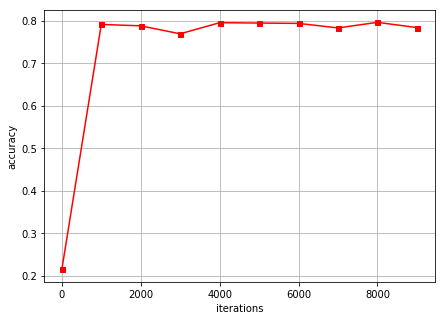

In [76]:
plt.figure(figsize=(7,5))

plt.plot(num_iteration_range,test_accuracy_sa_iterlist,color='red', marker='s',markersize=5 )

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.show()